#Deep learning

In [2]:
from tensorflow.keras import models, layers, utils, backend as K
import matplotlib.pyplot as plt
import shap
import tensorflow as tf
import pandas as pd


2022-06-06 15:36:24.780496: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-06 15:36:24.780519: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
n_features = 3
# Perceptron
# DeepNN
### layer input
inputs = layers.Input(name="input", shape=(n_features,))### hidden layer 1
h1 = layers.Dense(name="h1", units=4, activation='relu')(inputs)
#h1 = layers.Dropout(name="drop1", rate=0.2)(h1)### hidden layer 2
h2 = layers.Dense(name="h2", units=4, activation='relu')(h1)
#h2 = layers.Dropout(name="drop2", rate=0.2)(h2)### layer output

h3 = layers.Dense(name="h3", units=4, activation='relu')(h2)

h4 = layers.Dense(name="h4", units=4, activation='relu')(h3)

h5 = layers.Dense(name="h5", units=4, activation='relu')(h4)

h6 = layers.Dense(name="h6", units=4, activation='relu')(h5)

outputs = layers.Dense(name="output", units=1, activation='relu')(h2)
model = models.Model(inputs=inputs, outputs=outputs, name="DeepNN")
model.summary()

Model: "DeepNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 3)]               0         
                                                                 
 h1 (Dense)                  (None, 4)                 16        
                                                                 
 h2 (Dense)                  (None, 4)                 20        
                                                                 
 output (Dense)              (None, 1)                 5         
                                                                 
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


2022-06-04 20:45:32.607957: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-06-04 20:45:32.608019: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-06-04 20:45:32.608050: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (Robson-Aspire-A515-51): /proc/driver/nvidia/version does not exist
2022-06-04 20:45:32.608357: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


[[-1.29861581  0.69319537  0.52239579]
 [ 1.09165657  0.31566232 -1.19846895]
 [ 1.10328759 -1.25697297  1.64986385]
 ...
 [ 0.55827719  1.34162066 -0.37552577]
 [ 1.03690767 -0.35165615  1.21547112]
 [-0.14636902  0.84781243  1.38229363]]      1  2  3  4
1    0  0  1  0
3    1  0  0  0
5    1  0  0  0
7    1  0  0  0
8    1  0  0  0
..  .. .. .. ..
795  1  0  0  0
796  0  1  0  0
797  1  0  0  0
798  0  0  1  0
799  0  1  0  0

[553 rows x 4 columns]
4 1


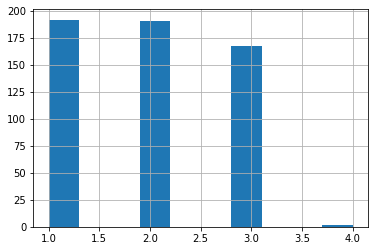

In [45]:
from helper import load_normalized_data_classification
def load_data():
    data = pd.read_csv('sinaisvitais_hist.txt', names=['id', 'pSis', 'pdiast', 'qPa', 'pulso', 'resp', 'grav', 'classe'])
    data_filter = data[data['classe'] == 2]
    data = data.drop(index=data_filter[:int(len(data_filter) * 0.565)].index, axis = 0)
    X_variables = data.iloc[:, 3:6]
    y_variables = data.iloc[:, 7]
    return X_variables, y_variables

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X, y = load_data()

scaler_x = StandardScaler()
scaler_y = StandardScaler()
scaler_x.fit(X)
X = scaler_x.transform(X)
y_original = y.copy()
y.hist()
y = pd.get_dummies(y)
#y_filter = y[y[2] == 1]
#y = y.drop(y_filter[:int(len(y_filter) * 0.5)])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)
X_test = X_test
y_test = y_test
X_train = X_train
y_train = y_train
print(X, y)
print(max(y), min(y))

In [19]:
y[y[2] == ]

,1,2,3,4
0,0,1,0,0
2,0,1,0,0
4,0,1,0,0
6,0,1,0,0
9,0,1,0,0
...,...,...,...,...
787,0,1,0,0
789,0,1,0,0
792,0,1,0,0
796,0,1,0,0


In [21]:
initializer = tf.keras.initializers.RandomNormal(mean=0., stddev=1.)

inputs = layers.Input(name="input", shape=(3,))

h1 = layers.Dense(name="h1", units=5,activation='relu')(inputs)
h2 = layers.Dense(name="h2", units=5,activation='relu')(h1)
h3 = layers.Dense(name="h3", units=5,activation='relu')(h2)
h4 = layers.Dense(name="h4", units=5,activation='relu')(h3)
h5 = layers.Dense(name="h5", units=5,activation='relu')(h4)
h6 = layers.Dense(name="h6", units=5,activation='relu')(h5)
outputs = layers.Dense(name="output", units=4, 
                       activation='softmax', kernel_initializer=initializer)(h5)
model = models.Model(inputs=inputs, outputs=outputs, 
                     name="Perceptron")
model.summary()

Model: "Perceptron"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 3)]               0         
                                                                 
 h1 (Dense)                  (None, 5)                 20        
                                                                 
 h2 (Dense)                  (None, 5)                 30        
                                                                 
 h3 (Dense)                  (None, 5)                 30        
                                                                 
 h4 (Dense)                  (None, 5)                 30        
                                                                 
 h5 (Dense)                  (None, 5)                 30        
                                                                 
 output (Dense)              (None, 4)                 2

2022-06-06 15:47:03.986772: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-06-06 15:47:03.986812: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-06-06 15:47:03.986838: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (Robson-Aspire-A515-51): /proc/driver/nvidia/version does not exist
2022-06-06 15:47:03.987227: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


<tf.Tensor: shape=(800, 3), dtype=float32, numpy=
array([[-1.3282274 , -0.8049972 , -0.31332573],
       [-1.3503083 ,  0.7469568 ,  0.55705404],
       [ 1.1097409 ,  0.18458574, -1.109523  ],
       ...,
       [ 0.55153674,  1.3947648 , -0.35302895],
       [ 1.0417539 , -0.2969004 ,  1.2595164 ],
       [-0.17016768,  0.90142655,  1.4285983 ]], dtype=float32)>

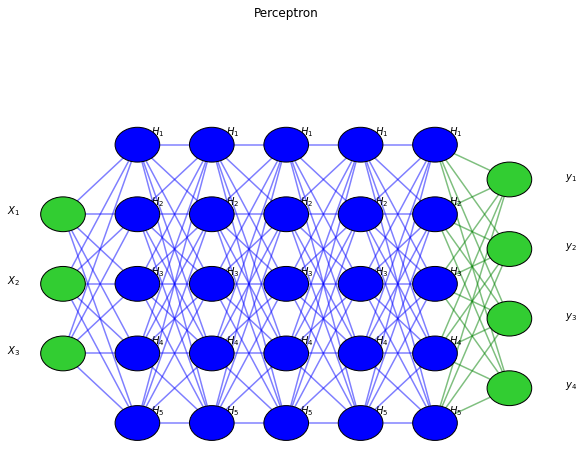

In [22]:
def utils_nn_config(model):
    lst_layers = []
    if "Sequential" in str(model): #-> Sequential doesn't show the input layer
        layer = model.layers[0]
        lst_layers.append({"name":"input", "in":int(layer.input.shape[-1]), "neurons":0, 
                           "out":int(layer.input.shape[-1]), "activation":None,
                           "params":0, "bias":0})
    for layer in model.layers:
        try:
            dic_layer = {"name":layer.name, "in":int(layer.input.shape[-1]), "neurons":layer.units, 
                         "out":int(layer.output.shape[-1]), "activation":layer.get_config()["activation"],
                         "params":layer.get_weights()[0], "bias":layer.get_weights()[1]}
        except:
            dic_layer = {"name":layer.name, "in":int(layer.input.shape[-1]), "neurons":0, 
                         "out":int(layer.output.shape[-1]), "activation":None,
                         "params":0, "bias":0}
        lst_layers.append(dic_layer)
    return lst_layers



'''
Plot the structure of a keras neural network.
'''
def visualize_nn(model, description=False, figsize=(10,8)):
    ## get layers info
    lst_layers = utils_nn_config(model)
    layer_sizes = [layer["out"] for layer in lst_layers]
    
    ## fig setup
    fig = plt.figure(figsize=figsize)
    ax = fig.gca()
    ax.set(title=model.name)
    ax.axis('off')
    left, right, bottom, top = 0.1, 0.9, 0.1, 0.9
    x_space = (right-left) / float(len(layer_sizes)-1)
    y_space = (top-bottom) / float(max(layer_sizes))
    p = 0.025
    
    ## nodes
    for i,n in enumerate(layer_sizes):
        top_on_layer = y_space*(n-1)/2.0 + (top+bottom)/2.0
        layer = lst_layers[i]
        color = "green" if i in [0, len(layer_sizes)-1] else "blue"
        color = "red" if (layer['neurons'] == 0) and (i > 0) else color
        
        ### add description
        if (description is True):
            d = i if i == 0 else i-0.5
            if layer['activation'] is None:
                plt.text(x=left+d*x_space, y=top, fontsize=10, color=color, s=layer["name"].upper())
            else:
                plt.text(x=left+d*x_space, y=top, fontsize=10, color=color, s=layer["name"].upper())
                plt.text(x=left+d*x_space, y=top-p, fontsize=10, color=color, s=layer['activation']+" (")
                plt.text(x=left+d*x_space, y=top-2*p, fontsize=10, color=color, s="Σ"+str(layer['in'])+"[X*w]+b")
                out = " Y"  if i == len(layer_sizes)-1 else " out"
                plt.text(x=left+d*x_space, y=top-3*p, fontsize=10, color=color, s=") = "+str(layer['neurons'])+out)
        
        ### circles
        for m in range(n):
            color = "limegreen" if color == "green" else color
            circle = plt.Circle(xy=(left+i*x_space, top_on_layer-m*y_space-4*p), radius=y_space/4.0, color=color, ec='k', zorder=4)
            ax.add_artist(circle)
            
            ### add text
            if i == 0:
                plt.text(x=left-4*p, y=top_on_layer-m*y_space-4*p, fontsize=10, s=r'$X_{'+str(m+1)+'}$')
            elif i == len(layer_sizes)-1:
                plt.text(x=right+4*p, y=top_on_layer-m*y_space-4*p, fontsize=10, s=r'$y_{'+str(m+1)+'}$')
            else:
                plt.text(x=left+i*x_space+p, y=top_on_layer-m*y_space+(y_space/8.+0.01*y_space)-4*p, fontsize=10, s=r'$H_{'+str(m+1)+'}$')
    
    ## links
    for i, (n_a, n_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer = lst_layers[i+1]
        color = "green" if i == len(layer_sizes)-2 else "blue"
        color = "red" if layer['neurons'] == 0 else color
        layer_top_a = y_space*(n_a-1)/2. + (top+bottom)/2. -4*p
        layer_top_b = y_space*(n_b-1)/2. + (top+bottom)/2. -4*p
        for m in range(n_a):
            for o in range(n_b):
                line = plt.Line2D([i*x_space+left, (i+1)*x_space+left], 
                                  [layer_top_a-m*y_space, layer_top_b-o*y_space], 
                                  c=color, alpha=0.5)
                if layer['activation'] is None:
                    if o == m:
                        ax.add_artist(line)
                else:
                    ax.add_artist(line)
    plt.show()
visualize_nn(model)

In [23]:
import tensorflow as tf
# define metrics
def Recall(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def Precision(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def F1(y_true, y_pred):
    precision = Precision(y_true, y_pred)
    recall = Recall(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

# compile the neural network
model.compile(optimizer='adam', loss='binary_crossentropy', 
              metrics=['accuracy',F1])

In [205]:
X_train

array([[ 0.541255  , -0.17636521, -1.01137295],
       [-0.75517515, -1.2921978 ,  0.19172069],
       [ 1.08869523,  1.65075484, -0.72570452],
       ...,
       [ 1.10974081,  0.72358953,  1.29226544],
       [ 0.55862752,  1.61471094,  0.7846153 ],
       [-0.53738748, -1.66842409,  0.41811745]])

KeyError: 'val_loss'

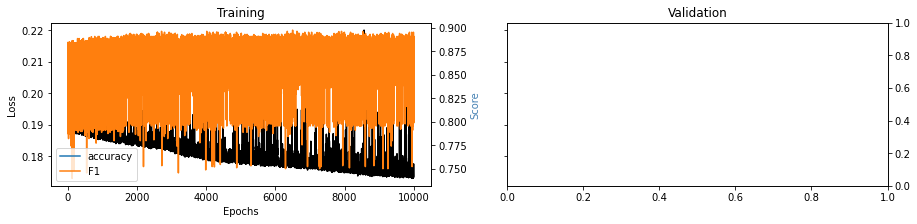

In [56]:

chk = tf.keras.callbacks.ModelCheckpoint("myModel.h5", monitor='val_loss', save_best_only=True) 
callbacks_list = [chk]
# train/validation
training = model.fit(x=X_train, y=y_train, batch_size=64, epochs=10000, shuffle=True, verbose=0)
# plot
metrics = [k for k in training.history.keys() if ("loss" not in k) and ("val" not in k)]    
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(15,3))
       
## training    
ax[0].set(title="Training")
ax11 = ax[0].twinx()
ax[0].plot(training.history['loss'], color='black')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss', color='black')
for metric in metrics:
    ax11.plot(training.history[metric], label=metric)
    ax11.set_ylabel("Score", color='steelblue')
ax11.legend()

## validation    
ax[1].set(title="Validation")    
ax22 = ax[1].twinx()    
ax[1].plot(training.history['val_loss'], color='black')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss', color='black')    
for metric in metrics:          
    ax22.plot(training.history['val_'+metric], label=metric) 
    ax22.set_ylabel("Score", color="steelblue")    
plt.show()

In [57]:
history = pd.DataFrame(training.history)
history

,loss,accuracy,F1
0,0.190450,0.860465,0.787443
1,0.190184,0.857881,0.831845
2,0.197139,0.847545,0.869235
3,0.203765,0.847545,0.821598
4,0.197103,0.844961,0.820684
...,...,...,...
9995,0.177535,0.868217,0.886161
9996,0.176817,0.865633,0.883928
9997,0.175008,0.873385,0.890625
9998,0.173879,0.873385,0.798586


In [58]:
X_test = pd.DataFrame(X_test).reset_index(drop=True)
y_test = pd.DataFrame(y_test).reset_index(drop=True)
predict = pd.DataFrame(model.predict(X_test))
df = pd.DataFrame()
df['previsao'] = predict.idxmax(axis=1)+1
df['real'] = y_test.idxmax(axis=1)
df

6/6 [==============================] - 0s 2ms/step


,previsao,real
0,1,2
1,2,2
2,2,2
3,1,1
4,3,2
...,...,...
161,3,2
162,1,1
163,3,3
164,1,1


In [53]:
pd.DataFrame(y_test).idxmax(axis=1)

730    2
634    2
475    2
635    1
658    2
      ..
685    2
354    1
253    3
74     1
692    2
Length: 166, dtype: int64

In [33]:
import pandas as pd
predict = model.predict(X_test)
df_predict = pd.DataFrame()
df_predict['real'] = y_test
df_predict['previsao'] = predict
df_predict

6/6 [==============================] - 0s 2ms/step


ValueError: Wrong number of items passed 4, placement implies 1

In [34]:

print(model.predict(X_test.iloc[0:1, :]), y_test.iloc[0])


AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

In [115]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt
mse = mean_squared_error(y_test, predict)
rmse = sqrt(mse)
mae = mean_absolute_error(y_test, predict)
r_squared = r2_score(y_test, predict)
print(mse, rmse, mae, r_squared)

0.0671785735787591 0.2591882975343584 0.20563714215718 -0.14300702635731288
